# Building a Scalable Data Warehouse and ETL Pipeline

# Extracting CSV Data

In [4]:
import pandas as pd
df_products = pd.read_csv('/Users/praveen/Desktop/products.csv')
print(df_products.head())

   product_id product_name     category   price  stock
0           1       Laptop  Electronics  999.99     50
1           2   Smartphone  Electronics  699.99    150
2           3   Headphones  Accessories  199.99    300
3           4      Monitor  Electronics  299.99     75
4           5        Mouse  Accessories   49.99    500


# Extracting JSON Data

In [5]:
import json
with open('/Users/praveen/Desktop/products.json') as f:
    data = json.load(f)
df_customers = pd.json_normalize(data)
print(df_customers.head())

  product_id product_name     category   price  stock
0          1       Laptop  Electronics  999.99     50
1          2   Smartphone  Electronics  699.99    150
2          3   Headphones  Accessories  199.99    300


# Extracting Data from API

In [7]:
response = requests.get('https://dummyjson.com/products')
df_transactions = pd.DataFrame(response.json()['products'])
print(df_transactions.head())

   id                          title  \
0   1  Essence Mascara Lash Princess   
1   2  Eyeshadow Palette with Mirror   
2   3                Powder Canister   
3   4                   Red Lipstick   
4   5                Red Nail Polish   

                                         description category  price  \
0  The Essence Mascara Lash Princess is a popular...   beauty   9.99   
1  The Eyeshadow Palette with Mirror offers a ver...   beauty  19.99   
2  The Powder Canister is a finely milled setting...   beauty  14.99   
3  The Red Lipstick is a classic and bold choice ...   beauty  12.99   
4  The Red Nail Polish offers a rich and glossy r...   beauty   8.99   

   discountPercentage  rating  stock                   tags           brand  \
0                7.17    4.94      5      [beauty, mascara]         Essence   
1                5.50    3.28     44    [beauty, eyeshadow]  Glamour Beauty   
2               18.14    3.82     59  [beauty, face powder]    Velvet Touch   
3         

In [11]:
df_transactions_spark.printSchema()
df_transactions_spark.show(5)

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- category: string (nullable = true)
 |-- price: double (nullable = true)
 |-- discountPercentage: double (nullable = true)
 |-- rating: double (nullable = true)
 |-- stock: integer (nullable = true)
 |-- tags: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- sku: string (nullable = true)
 |-- weight: integer (nullable = true)
 |-- dimensions: string (nullable = true)
 |-- warrantyInformation: string (nullable = true)
 |-- shippingInformation: string (nullable = true)
 |-- availabilityStatus: string (nullable = true)
 |-- reviews: string (nullable = true)
 |-- returnPolicy: string (nullable = true)
 |-- minimumOrderQuantity: integer (nullable = true)
 |-- meta: string (nullable = true)
 |-- images: string (nullable = true)
 |-- thumbnail: string (nullable = true)

+---+--------------------+--------------------+--------+-----+------------------+---

# Data Transformation with PySpark

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
spark = SparkSession.builder.appName('ProductDataTransformation').getOrCreate()
df_filtered = df_products.filter(col('price') > 20)
df_filtered.show()
df_avg_price = df_products.groupBy('category').agg(avg('price').alias('avg_price'))
df_avg_price.show()
df_in_stock_high_stock = df_products.filter((col('stock') > 100))
df_in_stock_high_stock.show()

+----------+------------+-----------+------+-----+
|product_id|product_name|   category| price|stock|
+----------+------------+-----------+------+-----+
|         1|      Laptop|Electronics|999.99|   50|
|         2|  Smartphone|Electronics|699.99|  150|
|         3|  Headphones|Accessories|199.99|  300|
|         4|     Monitor|Electronics|299.99|   75|
|         5|       Mouse|Accessories| 49.99|  500|
+----------+------------+-----------+------+-----+

+-----------+------------------+
|   category|         avg_price|
+-----------+------------------+
|Electronics| 666.6566666666666|
|Accessories|124.99000000000001|
+-----------+------------------+

+----------+------------+-----------+------+-----+
|product_id|product_name|   category| price|stock|
+----------+------------+-----------+------+-----+
|         2|  Smartphone|Electronics|699.99|  150|
|         3|  Headphones|Accessories|199.99|  300|
|         5|       Mouse|Accessories| 49.99|  500|
+----------+------------+----------

# Calculating the total stock value per category (price * stock)

In [14]:
from pyspark.sql.functions import sum
df_total_stock_value = df_products.withColumn("stock_value", col("price") * col("stock")) \
    .groupBy("category") \
    .agg(sum("stock_value").alias("total_stock_value"))
df_total_stock_value.show()

+-----------+-----------------+
|   category|total_stock_value|
+-----------+-----------------+
|Electronics|        177497.25|
|Accessories|          84992.0|
+-----------+-----------------+



In [15]:
df_avg_price.write.csv('path/to/save/avg_price_by_category.csv', header=True)

In [16]:
df_avg_price.write.parquet('path/to/save/avg_price_by_category.parquet')

# Visualizing the average price by category using Matplotlib

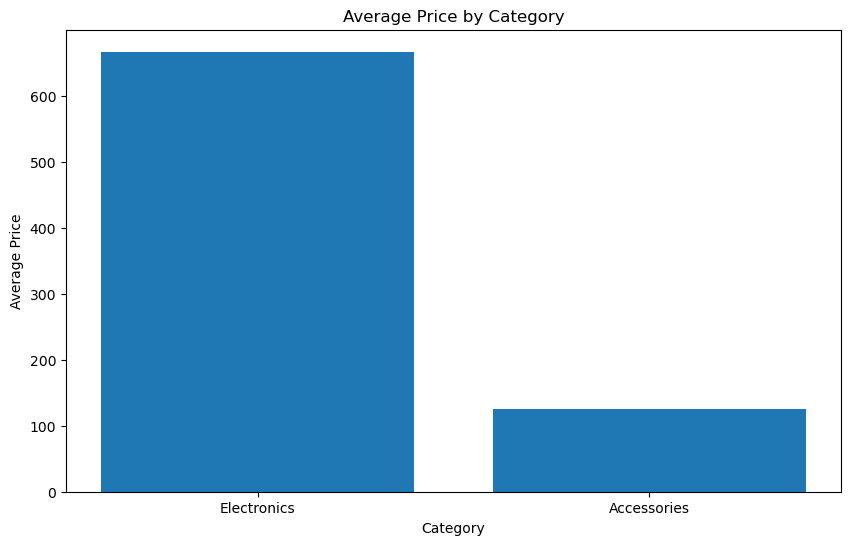

In [17]:
import matplotlib.pyplot as plt
df_avg_price_pandas = df_avg_price.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(df_avg_price_pandas['category'], df_avg_price_pandas['avg_price'])
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price by Category')
plt.show()